# Assignment Ch. 5 - Computer Vision [Case #1]
Startup Campus, Indonesia - `Artificial Intelligence Track`
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing

`PREREQUISITE` All modules (with their suitable versions) are installed properly.
<br>`TASK` Complete the notebook cell's code marked with <b>#TODO</b> comment.
<br>`TARGET PORTFOLIO` Students are able to replicate the image enhancement algorithm commonly (and recently) used in smartphone companies.
<br>`WARNING` Do **NOT CHANGE** any codes within the User-defined Functions (UDFs) section.

### Case Study Description
As of July 2023, both Apple and Samsung lead the smartphone industry worldwide, with a combined 52.61% of the total market share [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). As the main feature that must be present on today's smartphones, Apple and Samsung are competing to create camera technology so you can capture your best photo even in the low light condition.
- In September 2019, Apple introduced **Deep Fusion** technology (via the iPhone 11 series) to tackle the challenge. Its upgrade, named **Photonic Engine**, was introduced in September 2022 via the new iPhone 14 series [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- In February 2023, Samsung introduced **Adaptive Tetra-squared Pixel Sensor** technology with the Samsung S23 series as a counter-solution to a similar problem, promising excellent bright photo results from dark-toned images [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

At its core, both technologies work by combining several adjacent pixels into a single pixel, using a **Max Pooling** operation. In this case, you are challenged to replicate the concept (brighten dark-toned photos), and then compare the result with another approach, i.e., **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

[KLIK UNTUK TERJEMAHKAN TEKS](https://translate.google.com/?hl=id&ie=UTF-8&sl=en&tl=id&text=As%20of%20July%202023%2C%20both%20Apple%20and%20Samsung%20lead%20the%20smartphone%20industry%20worldwide%2C%20with%20a%20combined%2052.61%25%20of%20the%20total%20market%20share%20(ref1).%20As%20the%20main%20feature%20that%20must%20be%20present%20on%20today%27s%20smartphones%2C%20Apple%20and%20Samsung%20are%20competing%20to%20create%20camera%20technology%20so%20you%20can%20capture%20your%20best%20photo%20even%20in%20the%20low%20light%20condition.%0A%0A-%20In%20September%202019%2C%20Apple%20introduced%20Deep%20Fusion%20technology%20(via%20the%20iPhone%2011%20series)%20to%20tackle%20the%20challenge.%20Its%20upgrade%2C%20named%20Photonic%20Engine%2C%20was%20introduced%20in%20September%202022%20via%20the%20new%20iPhone%2014%20series%20(ref2).%0A%0A-%20In%20February%202023%2C%20Samsung%20introduced%20Adaptive%20Tetra-squared%20Pixel%20Sensor%20technology%20with%20the%20Samsung%20S23%20series%20as%20a%20counter-solution%20to%20a%20similar%20problem%2C%20promising%20excellent%20bright%20photo%20results%20from%20dark-toned%20images%20(ref3).%0A%0AAt%20its%20core%2C%20both%20technologies%20work%20by%20combining%20several%20adjacent%20pixels%20into%20a%20single%20pixel%2C%20using%20a%20Max%20Pooling%20operation.%20In%20this%20case%2C%20you%20are%20challenged%20to%20replicate%20the%20concept%20(brighten%20dark-toned%20photos)%2C%20and%20then%20compare%20the%20result%20with%20another%20approach%2C%20i.e.%2C%20Contrast%20Limited%20Adaptive%20Histogram%20Equation%20(CLAHE).&op=translate)

### Import libraries

In [1]:
import numpy as np, cv2
from skimage.io import imsave
from skimage.measure import block_reduce
from torch.nn import MaxPool2d
from torch import from_numpy
from matplotlib import pyplot as plt
from matplotlib.image import imread

### User-defined Functions (UDFs)

In [2]:
def plot(
    imgs : list,
    titles : list = ["ORIGINAL", "EDITED"],
    figsize : tuple = (8, 5),
    cmaps : list = [None, None],
    *args, **kwargs
) -> None:

    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [3]:
def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB)) # convert to LAB color model
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light) # apply CLAHE for lightness (L) component only
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR) # return with reconvert to BGR color model

### Load dataset
Do NOT forget to upload "photo1.jpeg" and "lena.png" to the Google Collab files.

In [5]:
img = imread("photo1.jpeg")

In [6]:
lena = cv2.imread("lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

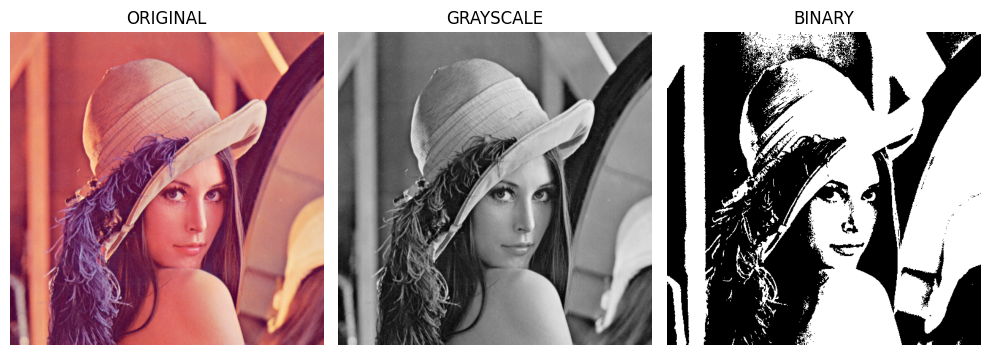

In [22]:
import cv2
import matplotlib.pyplot as plt

# original image
img_lena = cv2.imread('lena.png')

# Change the color channel from BGR to RGB
img_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)

# color image to grayscaled image
img_grayscaled = cv2.cvtColor(img_lena, cv2.COLOR_RGB2GRAY)

# grayscaled image to binary image
_, img_binary = cv2.threshold(img_grayscaled, 127, 255, cv2.THRESH_BINARY)

# plot both
plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.imshow(img_lena)
plt.title("ORIGINAL")
plt.axis('off')

plt.subplot(132)
plt.imshow(img_grayscaled, cmap='gray')
plt.title("GRAYSCALE")
plt.axis('off')

plt.subplot(133)
plt.imshow(img_binary, cmap='gray')
plt.title("BINARY")
plt.axis('off')

plt.tight_layout()
plt.show()


* Check their histograms

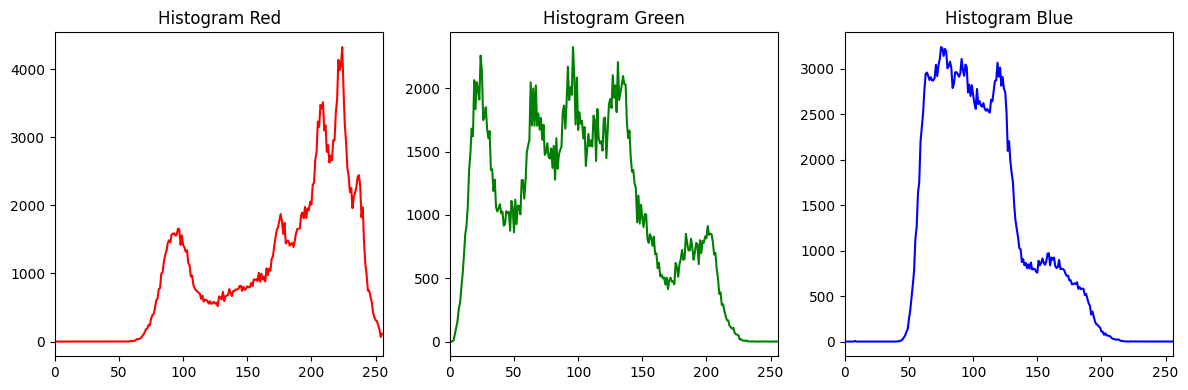

In [23]:
# TODO: Plot the histogram from the original image
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_lena = cv2.imread('lena.png')

# Ubah kanal warna dari BGR ke RGB
img_lena_rgb = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)

# Hitung histogram untuk setiap saluran warna (R, G, B)
hist_r = cv2.calcHist([img_lena_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img_lena_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([img_lena_rgb], [2], None, [256], [0, 256])

# Plot histogram
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(hist_r, color='red')
plt.title("Histogram Red")
plt.xlim([0, 256])

plt.subplot(132)
plt.plot(hist_g, color='green')
plt.title("Histogram Green")
plt.xlim([0, 256])

plt.subplot(133)
plt.plot(hist_b, color='blue')
plt.title("Histogram Blue")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


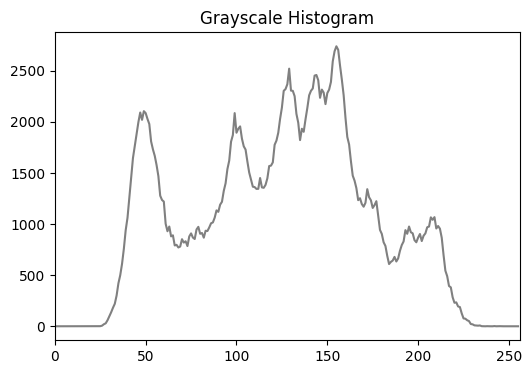

In [24]:
# TODO: Plot the histogram from the grayscaled image
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_lena = cv2.imread('lena.png')

# Ubah kanal warna dari BGR ke Grayscale
img_grayscaled = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)

# Hitung histogram untuk gambar grayscaled
hist = cv2.calcHist([img_grayscaled], [0], None, [256], [0, 256])

# Plot histogram
plt.figure(figsize=(6, 4))

plt.plot(hist, color='gray')
plt.title("Grayscale Histogram")
plt.xlim([0, 256])

plt.show()


### Max Pooling (using Scikit-image)

In [25]:
BLOCK_SIZE = (4, 4, 1)

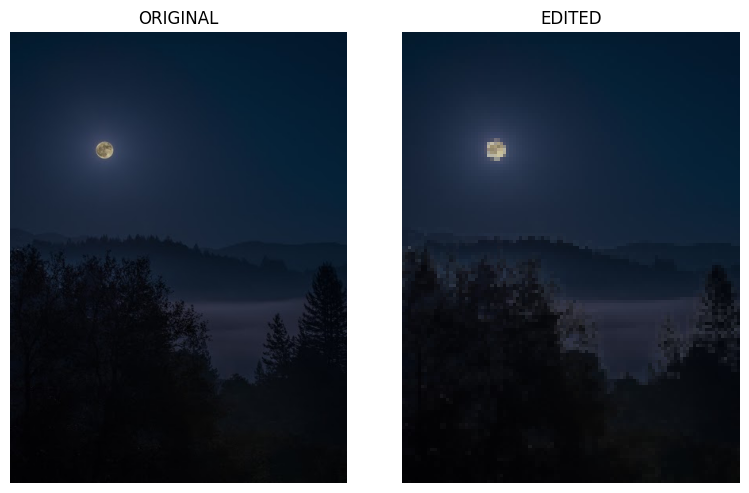

In [26]:
img_edited = block_reduce(img, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img, img_edited])

### Max Pooling (using PyTorch)

<ipython-input-27-c192e6f61ca2>:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_torch = from_numpy(img).permute(2, 0, 1).float()


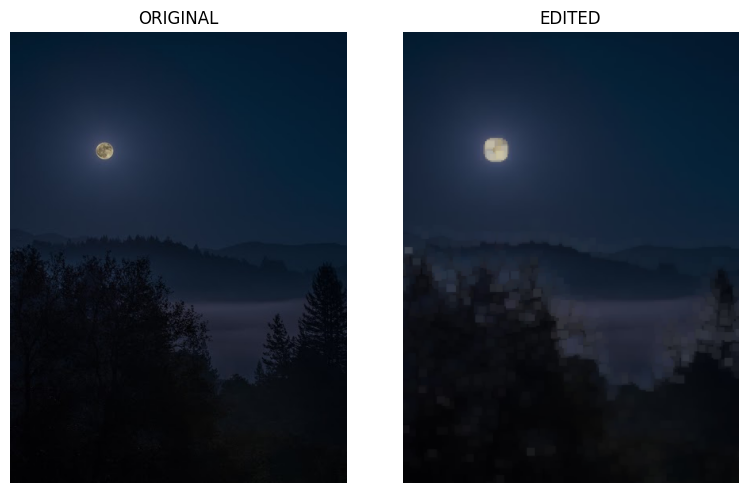

In [27]:
# convert numpy-based image to torch.Tensor type
img_torch = from_numpy(img).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[img, img_torch_edited])

In [ ]:
# QUESTIONS
# TODO: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?

[ ANSWER HERE ]

PyTorch itu lebih baik dalam hal "Max Pooling" dibandingkan dengan Scikit-image. Dalam PyTorch, operasi "Max Pooling" ini lebih bisa disesuaikan, otomatis menghitung gradien (untuk melatih jaringan saraf), lebih cepat karena bisa menggunakan GPU, mudah diintegrasikan dengan jaringan saraf, dan semuanya jadi satu paket dalam kerangka kerja deep learning yang lengkap. Sedangkan Max Pooling di Scikit-image lebih digunakan untuk tugas pemrosesan gambar biasa. Hanya membuat operasi dasar untuk pooling dan tidak punya kemampuan deep learning, fleksibilitas, atau dukungan GPU seperti yang ada di PyTorch.


### Min Pooling and Average Pooling

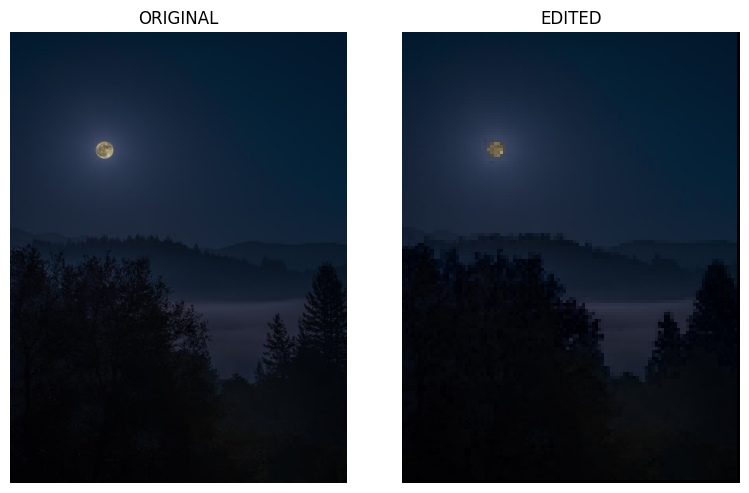

In [31]:
img_edited_min = block_reduce(img, block_size=BLOCK_SIZE, func=np.min)
plot(imgs=[img, img_edited_min])

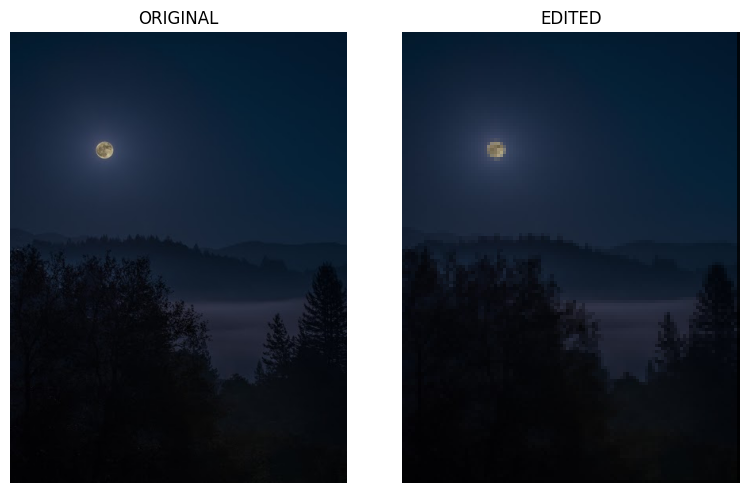

In [32]:
img_edited_avg = (block_reduce(img, block_size=BLOCK_SIZE, func=np.mean)).astype(int)
plot(imgs=[img, img_edited_avg])

In [ ]:
# QUESTIONS
# TODO: What is the difference between Min Pooling and Average Pooling operations?
# If you cannot see the difference, try with another image or change the BLOCK_SIZE.

Max Pooling adalah cara untuk "memperkecil" gambar dengan mengambil nilai terbesar dalam kotak kecil di gambar, yang disebut kernel. Ini membantu mengurangi resolusi gambar sambil mempertahankan fitur-fitur penting.

[ ANSWER HERE ]

Min Pooling seperti memilih yang paling kecil dari data di dalam jendela pooling. Jadi, ini akan fokus ke yang paling gelap atau yang paling kecil di area itu. Min Pooling bagus untuk menjaga detail-detail kecil, khususnya untuk nentuin yang paling kecil.

Berbeda dengan Average Pooling, mengngitung rata-rata dari semua data di dalam jendela pooling. Jadi, ini membuat data menjadi lebih halus dan bisa ngurangin noise, seperti efek smoothing. Cocok untuk menghapus gangguan kecil di data atau gambar.

Jika dilihat dari hasilnya, Min Pooling akan menghighlight yang paling gelap, sementara Average Pooling akan membuat data lebih halus dan kurang noise. Jadi, pilihan antara dua operasi ini tergantung kebutuhan, apakah diperlukan untuk menjelaskan detail kecil atau menghilangkan noise.

### CLAHE
Now imagine you have a better approach to compete Apple's Photonic Engine and Samsung's Adaptive Tetra-squared Pixel technologies using **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. How's the result?

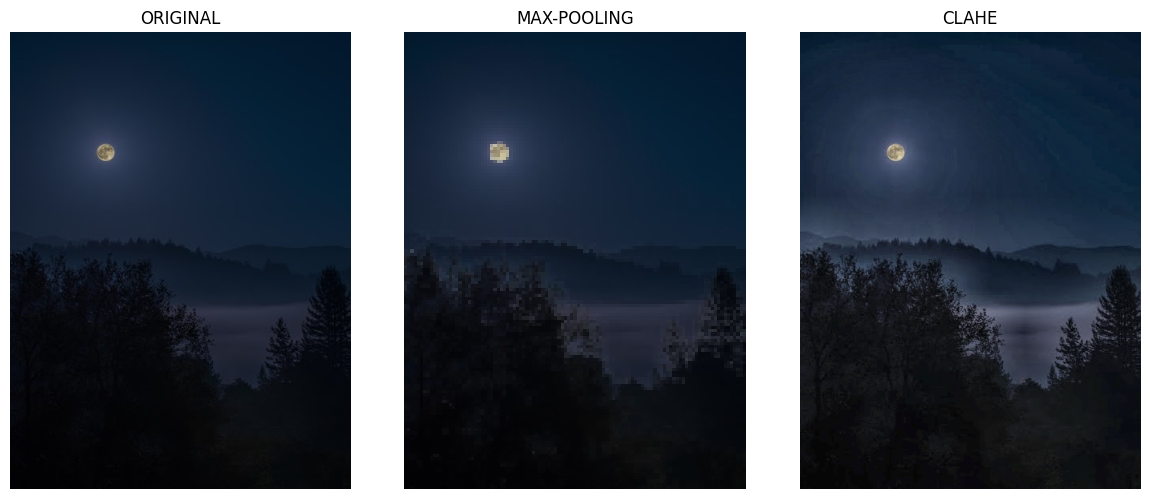

In [33]:
img_clahe = apply_clahe_rgb(img)
plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

In [ ]:
# QUESTIONS
# TODO: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?

[ ANSWER HERE ]

CLAHE (Contrast Limited Adaptive Histogram Equalization) lebih baik dibanding Max Pooling untuk mencerahkan gambar yang warnanya gelap. CLAHE bisa menyesuaikan diri dengan perbedaan kontras lokal, jadi detail-detail penting tetap terjaga sementara noise berkurang. Hasilnya, gambar jadi lebih bagus. CLAHE sering digunakan di berbagai aplikasi pemrosesan gambar, khususnya di bidang seperti pengolahan gambar medis dan computer vision, di mana detail gambar harus terjaga.

### Save your edited image

In [39]:
FILE_NAME = "sampel-CLAHE.png"
imsave(fname=FILE_NAME, arr=img_clahe)

### Scoring
Total `#TODO` = 12
<br>Checklist:

- [X] Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB
- [X] Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
- [X] Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY
- [X] Plot the histogram from the original image
- [X] Plot the histogram from the grayscaled image
- [X] QUESTION: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?
- [X] Recall the block_reduce(), but with func=np.min
- [X] Recall the block_reduce().astype(int), but with func=np.mean
- [X] What is the difference between Min Pooling and Average Pooling operations?
- [X] Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
- [X] QUESTION: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?
- [X] Give any file name to your new CLAHE-enhanced photo, ends with .png extension

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

### Copyright © 2023 Startup Campus, Indonesia
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.